# Post process codex outputs

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import time
import json
import pickle

In [17]:
from utils import parse_codex_outputs, vis_prob_flow, vis_heatmap, test_acc, majority_vote_acc

In [4]:
codex_lines = open('../outputs/gsm8k/train_codex_complex_total.txt').readlines()

In [ ]:
codex_questions = pickle.load(open('codex_questions.pkl', 'rb'))
codex_answers = pickle.load(open('codex_answers.pkl', 'rb'))
codex_predictions = pickle.load(open('codex_predictions.pkl', 'rb'))
codex_per_step_probs = pickle.load(open('codex_per_step_probs.pkl', 'rb'))

In [5]:
codex_questions, codex_answers, codex_predictions, codex_per_step_probs = parse_codex_outputs(codex_lines)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7473/7473 [06:28<00:00, 19.22it/s]


## Training performance, random acc 63.84, majority voting 83.79

In [15]:
test_acc(codex_predictions, codex_answers)

total 7473, pred 4771, acc 0.6384


0.6384316874080022

In [18]:
majority_vote_acc(codex_predictions, codex_answers)

total 7473, pred 6262, acc 0.8379


6262

In [13]:
len(codex_questions)

7474

In [30]:
codex_questions[0]

'Question 0: Natalia sold clips to 48 of her friends in April, and then she sold half as many clips in May. How many clips did Natalia sell altogether in April and May?\n'

In [31]:
codex_answers[0]

'Answer: Natalia sold 48/2 = <<48/2=24>>24 clips in May.\nNatalia sold 48+24 = <<48+24=72>>72 clips altogether in April and May.\n#### 72\n'

In [32]:
codex_predictions[0][0]

'Model output 0: \nIf Natalia sold 48 clips in April, she sold 48/2 = 24 clips in May.\nIn total, Natalia sold 48 + 24 = 72 clips in April and May.\nThe answer is 72\n'

In [48]:
len(codex_per_step_probs[0][0])

47

In [45]:
codex_per_step_probs

[[[(' step', 1.0),
   ('!', 0.0),
   (' stepped', 0.0),
   (' stepping', 0.0),
   (' step', 1.0),
   (' steps', 0.0)],
  [('\n', 0.9862),
   ('!', 0.0002),
   ('.', 0.009),
   ('\n', 0.9862),
   (' ', 0.001),
   (':', 0.0025)],
  [('If', 0.1009),
   ('If', 0.1009),
   ('She', 0.0416),
   ('The', 0.0394),
   ('Nat', 0.3286),
   ('In', 0.2685)],
  [(' Nat', 0.6018),
   (' Nat', 0.6018),
   (' in', 0.0261),
   (' we', 0.0125),
   (' 48', 0.0335),
   (' she', 0.2588)],
  [('alia', 0.9968),
   ('ale', 0.0001),
   ('ilia', 0.0001),
   ('lia', 0.0002),
   (' sold', 0.0013),
   ('alia', 0.9968)],
  [(' sold', 0.9573),
   (' sells', 0.0217),
   (' sold', 0.9573),
   (' is', 0.0022),
   ("'s", 0.0028),
   (' had', 0.0024)],
  [(' 48', 0.4455),
   (' clips', 0.3353),
   (' half', 0.1318),
   (' to', 0.0351),
   (' 48', 0.4455),
   (' twice', 0.0058)],
  [(' clips', 0.9248),
   (' clips', 0.9248),
   (' friends', 0.0062),
   (' to', 0.0058),
   (' of', 0.0109),
   (' in', 0.0345)],
  [(' in', 0.75

## Load save data

In [6]:
start_time = time.time()
pickle.dump(codex_questions, open('codex_questions.pkl', 'wb'))
print('dump time %.2fs' % (time.time() - start_time))

dump time 0.01s


In [10]:
start_time = time.time()
pickle.dump(codex_predictions, open('codex_predictions.pkl', 'wb'))
print('dump time %.2fs' % (time.time() - start_time))

dump time 0.25s


In [ ]:
start_time = time.time()
pickle.dump(codex_answers, open('codex_answers.pkl', 'wb'))
print('dump time %.2fs' % (time.time() - start_time))

In [8]:
codex_questions_ = pickle.load(open('codex_questions.pkl', 'rb'))

In [50]:
pickle.dump(codex_per_step_probs, open('codex_per_step_probs.pkl', 'wb'))

In [52]:
start_time = time.time()
codex_per_step_probs_ = pickle.load(open('codex_per_step_probs.pkl', 'rb'))
print('load time %.2fs' % (time.time() - start_time))

load time 166.55s


In [55]:
start_time = time.time()
json.dump(codex_per_step_probs, open('codex_per_step_probs.json', 'w'))
print('json dump time %.2fs' % (time.time() - start_time))

json dump time 627.08s


In [56]:
start_time = time.time()
codex_per_step_probs_ = json.load(open('codex_per_step_probs.json', 'r'))
print('json read time %.2fs' % (time.time() - start_time))

json read time 752.26s


In [39]:
len(codex_per_step_probs[3000])

40

Question 0: Natalia sold clips to 48 of her friends in April, and then she sold half as many clips in May. How many clips did Natalia sell altogether in April and May?

Answer: Natalia sold 48/2 = <<48/2=24>>24 clips in May.
Natalia sold 48+24 = <<48+24=72>>72 clips altogether in April and May.
#### 72

Model output 0: 
If Natalia sold 48 clips in April, she sold 48/2 = 24 clips in May.
In total, Natalia sold 48 + 24 = 72 clips in April and May.
The answer is 72



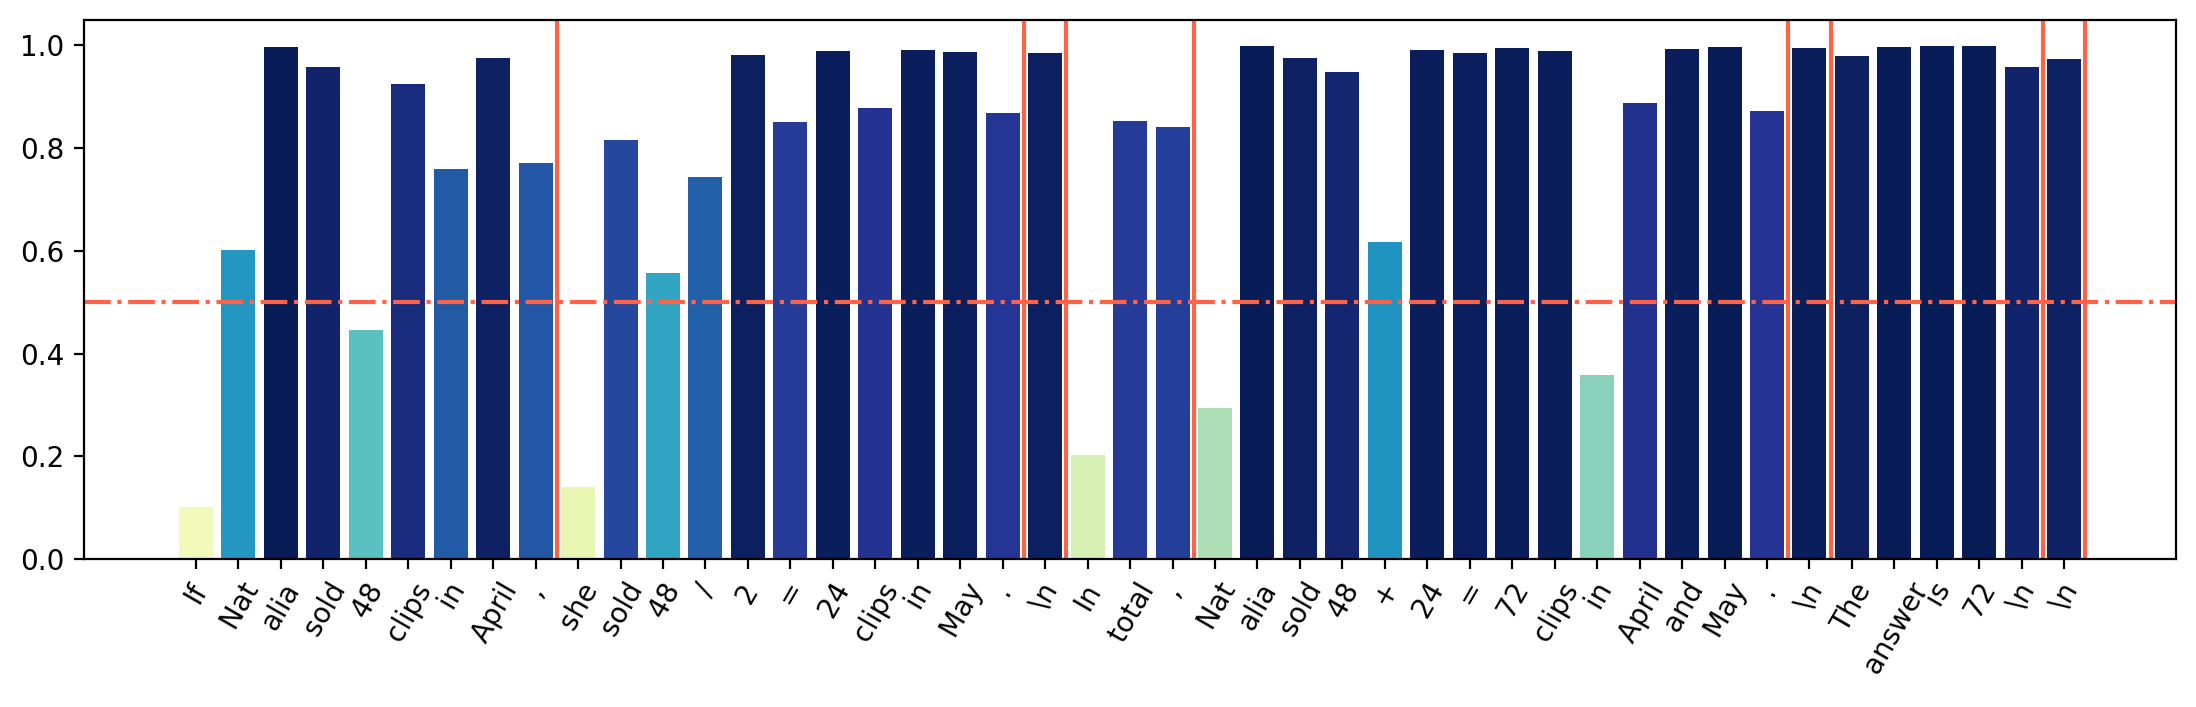

In [43]:
vis_prob_flow(codex_questions, codex_answers, codex_predictions, codex_per_step_probs, 0, 0)

Question 0: Natalia sold clips to 48 of her friends in April, and then she sold half as many clips in May. How many clips did Natalia sell altogether in April and May?

Answer: Natalia sold 48/2 = <<48/2=24>>24 clips in May.
Natalia sold 48+24 = <<48+24=72>>72 clips altogether in April and May.
#### 72

Model output 0: 
If Natalia sold 48 clips in April, she sold 48/2 = 24 clips in May.
In total, Natalia sold 48 + 24 = 72 clips in April and May.
The answer is 72



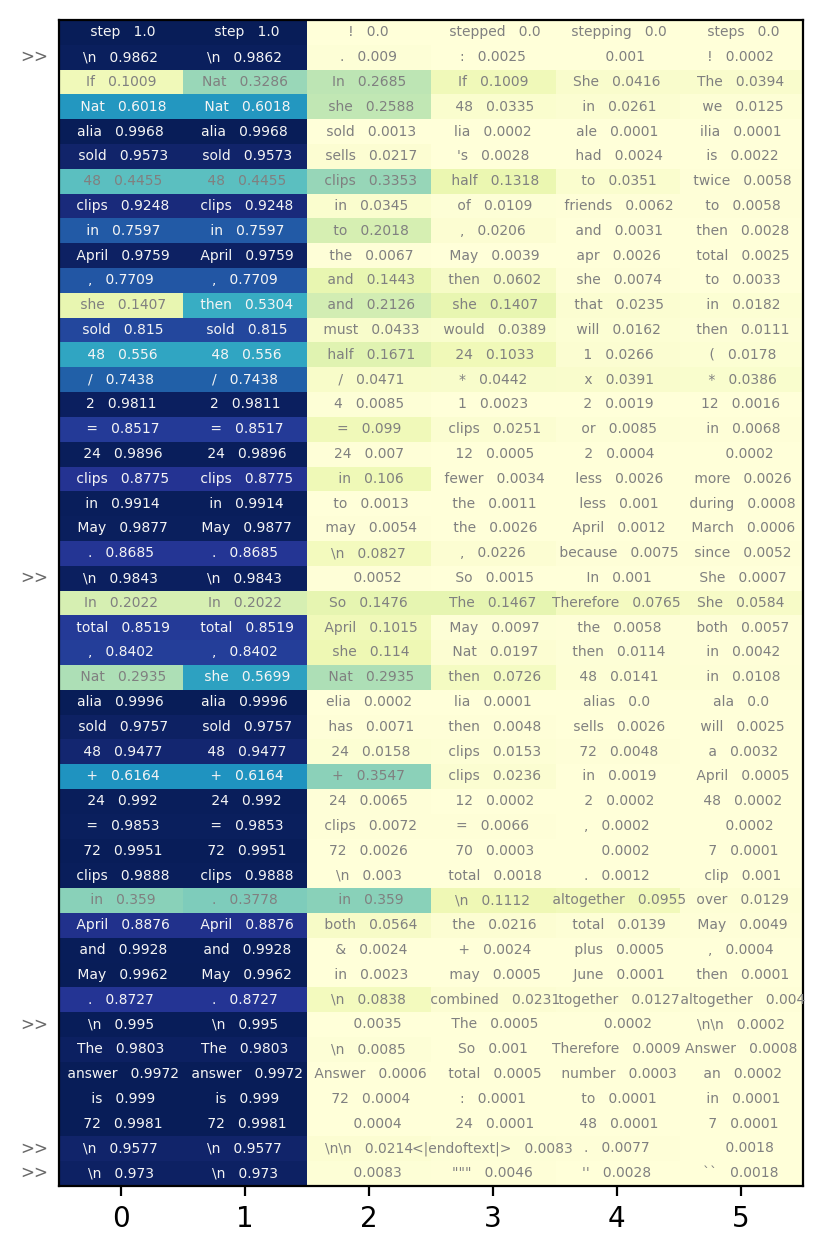

In [44]:
vis_heatmap(codex_questions, codex_answers, codex_predictions, codex_per_step_probs, 0, 0)